<a href="https://colab.research.google.com/github/AngTorresv/Redes-Neuronales/blob/main/TP1/Red_Neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica Redes neuronales 




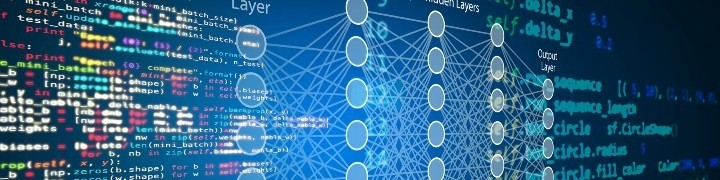




Problema de clasificacion

In [ ]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from IPython.display import display, Math, Latex



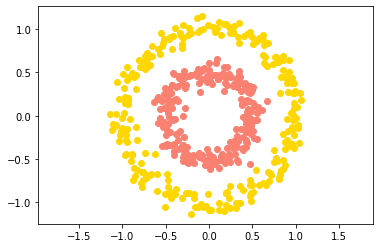

In [ ]:
n = 500
p = 2

X,Y = make_circles(n_samples=n , factor=0.5 , noise = 0.07 )
Y = Y[:, np.newaxis]
plt.scatter(X[Y[:,0]==0,0],X[Y[:,0]==0,1],c='gold')
plt.scatter(X[Y[:,0]==1,0],X[Y[:,0]==1,1],c='salmon')
plt.axis('equal')
plt.show()

# Red Neural Sin Usar Librerias

In [ ]:
class neural_layer():
  def __init__(self, n_conn , n_neur, act_f ):
    self.b = np.random.rand(1, n_neur)*2-1
    self.w = np.random.rand(n_conn,n_neur)*2-1
    self.act_f = act_f

    

<IPython.core.display.Math object>

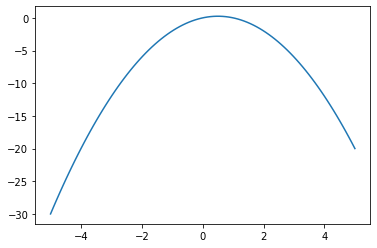

In [ ]:
Relu = (lambda x : np.maximum(0,x),

          lambda x : 1. * (x > 0))

sigm = (lambda x : 1/(1 + np.e**(-x)),
         lambda x : x*(1-x))

_x = np.linspace(-5,5,100)
plt.plot(_x , sigm[1](_x))
display(Math(r'Sigm=\frac{1}{1+e^{-x}}, \frac{\partial Sigm}{\partial x}= Sigm(1-Sigm)'))


In [ ]:

def create_nn(topology , act_f):
  nn = []

  for l, layer in  enumerate(topology[:-1]):
        nn.append(neural_layer(topology[l] , topology[l+1], act_f))
  return nn

   

In [ ]:
topology = [p, 4, 1]
create_nn(topology , sigm[0])

In [ ]:
neural_net = create_nn(topology, sigm)

cost = (lambda Yp , Yr : np.mean((Yr - Yp)**2),
        lambda Yp , Yr: (Yp - Yr))
display(Math(r'MSE = \frac{1}{n}{\sum_{i=1}^n{(Yp_i - Yr_i)}^2}, \frac{\partial MSE }{\partial Yp} = \sum_{i=1}^n(Yr_i - Yp_i)'))

<IPython.core.display.Math object>

In [ ]:


def train(neural_net , X,Y,cost ,Lr , Train=True):
  out = [(None,X)]
  
  for l , layer in enumerate(neural_net):
   
      z = out[-1][1] @ neural_net[l].w + neural_net[l].b

      a = neural_net[l].act_f[0](z)

      out.append((z, a))

  if Train:
     deltas = []
     for l in reversed(range(0,len(neural_net))):
       z = out[l+1][0]
       a = out[l+1][1]
       if l == len(neural_net)-1:
         deltas.insert(0,cost[1](a,Y)*neural_net[l].act_f[1](a))
       else:
         deltas.insert(0,deltas[0] @ _w.T * neural_net[l].act_f[1](a))

       _w = neural_net[l].w

       neural_net[l].b = neural_net[l].b - np.mean(deltas[0],axis=0,keepdims=True)*Lr
       neural_net[l].w = neural_net[l].w - out[l][1].T @ deltas[0]*Lr
      
  return out[-1][1] 


#train(neural_net, X,Y ,cost,0.05, Train = True)
print('BACK PROPAGATION')
print('delta para la ultima capa')
display(Math(r' \delta ^l= \frac{\partial MSE}{\partial a^l}\frac{\partial a^l}{\partial z^l}'))
print('delta para las demas capas')
display(Math(r'\delta ^{l-1}=w^l\delta ^l\frac{\partial a^{l-1}}{\partial z^{l-1}}'))
print('GRADIAN DECENT')
display(Math(r'b = b-\delta ^lLr'))
display(Math(r'W= W-\delta ^la^lLr'))


BACK PROPAGATION
delta para la ultima capa


<IPython.core.display.Math object>

delta para las demas capas


<IPython.core.display.Math object>

GRADIAN DECENT


<IPython.core.display.Math object>

<IPython.core.display.Math object>

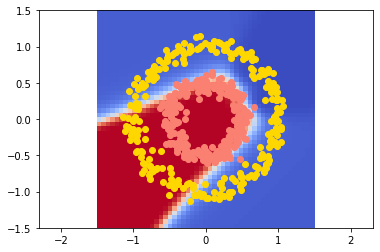

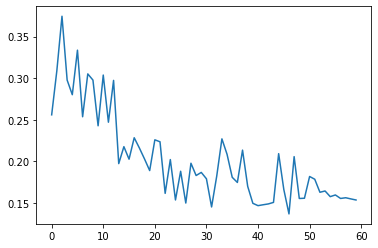

In [ ]:
import time
from IPython.display import  clear_output

neural_n = create_nn(topology, sigm)
loss = []
for i in range(1500):
  Yp = train(neural_n, X,Y ,cost,0.1 )
  if i % 25 == 0:
    loss.append(cost[0](Yp , Y ))
    res = 50
    _x0 = np.linspace(-1.5,1.5, res)
    _x1 = np.linspace(-1.5,1.5, res)
    _Y = np.zeros((res,res))
    for i0, x0 in enumerate(_x0):
     for i1, x1 in enumerate(_x1):
        _Y[i0, i1] = train(neural_n, np.array([[x0,x1]]), Y,cost,0.05, Train = False)[0][0]
    plt.pcolormesh(_x0,_x1,_Y,cmap='coolwarm')
    plt.axis('equal')
    plt.scatter(X[Y[:,0]==0,0],X[Y[:,0]==0,1],c='gold')
    plt.scatter(X[Y[:,0]==1,0],X[Y[:,0]==1,1],c='salmon')
    clear_output(wait = True)
    plt.show()
    plt.plot(range(len(loss)),loss)
    plt.show()
    time.sleep(0.5)
    

Red neurona Usando TensorFlow y IPython



In [ ]:
from  matplotlib import animation
from IPython.core.display import display, HTML 
import tensorflow.keras as  kr

In [ ]:
topology = [2,4,1]
lr = 0.01
model = kr.Sequential()
model.add(kr.layers.Dense(topology[1],activation = 'sigmoid'))
model.add(kr.layers.Dense(topology[2],activation = 'sigmoid'))
#model.add(kr.layers.Dense(topology[2],activation = 'sigmoid'))

In [ ]:
print('comienza el entrenamiento')
model.compile(loss = 'mse',optimizer= kr.optimizers.SGD(lr=lr),metrics=['acc'])
nn = model.fit(X,Y,epochs=1000)
print('entrenamiento terminado')

comienza el entrenamiento
Epoch 1/1000


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


16/16 [==============================] - 0s 2ms/step - loss: 0.2799 - acc: 0.5000
Epoch 2/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.2780 - acc: 0.5000
Epoch 3/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.2763 - acc: 0.5000
Epoch 4/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.2746 - acc: 0.5000
Epoch 5/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.2730 - acc: 0.5000
Epoch 6/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.2715 - acc: 0.5000
Epoch 7/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.2701 - acc: 0.5000
Epoch 8/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.2688 - acc: 0.5000
Epoch 9/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.2676 - acc: 0.5000
Epoch 10/1000
16/16 [==============================] - 0s 2ms/step - loss: 0.2664 - acc: 0.5000
Epoch 11/1000
16/16 [==============================] - 0s 2ms/

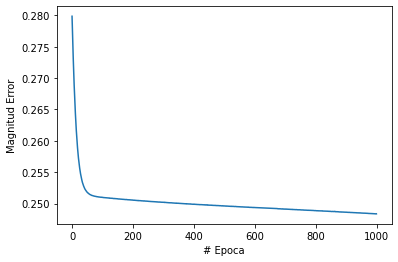

In [ ]:
plt.xlabel('# Epoca')
plt.ylabel('Magnitud Error')
plt.plot(nn.history['loss'])
plt.show()

Red neurona Usando Sk learn

In [ ]:
import sklearn as sk
import sklearn.neural_network 


In [ ]:
topology = [2,4,1]
lr = 0.01

model = sk.neural_network.MLPRegressor(solver='sgd', 
                                     learning_rate_init=lr, 
                                     hidden_layer_sizes=tuple(topology[1:]),
                                     verbose=False,
                                     n_iter_no_change=1000,
                                     batch_size = 64)


# Y lo entrenamos con nuestro datos.
model.fit(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPRegressor(batch_size=64, hidden_layer_sizes=(4, 1), learning_rate_init=0.01,
             n_iter_no_change=1000, solver='sgd')